### Load libraries

In [1]:
import pickle
import multiprocessing
import os
import gensim.models.word2vec as w2v
from gensim.models import KeyedVectors
import pandas as pd
from sklearn.manifold import TSNE

### Set embeddings destination folder
In case of only loading existing word embeddings, run this block and skip to load trained embeddings

In [2]:
# destination of embeddings
path_to_embeddings = os.path.join('articles', 'processed','trained_embeddings')

### Load pickle files of article sentences

In [3]:
#load sentences
sentences = []
path_to_pickle_files = os.path.join('articles', 'processed', 'word2vec_pickles')

list_of_pickles = os.listdir(path_to_pickle_files)
#print(list_of_pickles)

def pickleLoader(pklFile):
    try:
        while True:
            yield pickle.load(pklFile)
    except EOFError:
        pass
    
for pickle_file in list_of_pickles:
    with open(os.path.join(path_to_pickle_files, pickle_file), 'rb') as f:
        for sentence in pickleLoader(f):
            #print(sentence)
            sentences.append(sentence)

token_count = sum([len(sentence) for sentence in sentences])
print('The corpus consists of {0:,} sentences'.format(len(sentences)))
print("The corpus contains {0:,} tokens".format(token_count))

The corpus consists of 672,051 sentences
The corpus contains 10,719,537 tokens


### Define training parameters

In [19]:
# Dimensionality of the resulting word vectors.
#more dimensions, more computationally expensive to train
#but also more accurate
#more dimensions = more generalized
num_features = 100

# Minimum word count threshold.
# words with frequency under this threshold will be excluded from the vocabulary
min_word_count = 10

# Number of threads to run in parallel.
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 5

# Downsample setting for frequent words.
downsampling = 1e-5

# Seed for the RNG, to make the results reproducible.
#random number generator
#deterministic, good for debugging
seed = 1

### Construct model

In [20]:
articles2vec = w2v.Word2Vec(
    sg=0, # 0/1 CBOW/skip-gram
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

articles2vec.build_vocab(sentences)
print("Word2Vec vocabulary length:", len(articles2vec.wv.vocab))

Word2Vec vocabulary length: 52011


### Train

In [21]:
# start training
articles2vec.train(sentences, total_examples=articles2vec.corpus_count, epochs=10)

(49812310, 107195370)

### Save trained embeddings

In [22]:
# name of embeddings to save
embeddings_name = 'all100_new'

# check if destination folder exists if not create it
if not os.path.exists(path_to_embeddings):
    os.makedirs(path_to_embeddings)

# save model in various formats
# w2v format is and old format, most common is the binary format
articles2vec.save(os.path.join(path_to_embeddings, '{}.w2v'.format(embeddings_name)))
articles2vec.wv.save_word2vec_format(os.path.join(path_to_embeddings, '{}.txt'.format(embeddings_name)), binary=False)
articles2vec.wv.save_word2vec_format(os.path.join(path_to_embeddings, '{}.bin'.format(embeddings_name)), binary=True)

### Load trained embeddings

In [5]:
#load trained vectors
articles2vec = KeyedVectors.load_word2vec_format(os.path.join(path_to_embeddings, 'all100_final.bin'), binary=True)

### Assess embeddings
How good did embeddings capture relationships and article context?

In [6]:
articles2vec.most_similar(positive=['φώφη','γεννηματά'])

[('φώφης', 0.8989222049713135),
 ('κινήματος', 0.895399808883667),
 ('αλλαγής', 0.8819663524627686),
 ('αλλ', 0.778783917427063),
 ('κίνημα', 0.7720643877983093),
 ('κιν', 0.765282154083252),
 ('γεννήματα', 0.760593056678772),
 ('κόμματός', 0.7592315673828125),
 ('κιναλη', 0.7565701603889465),
 ('κιναλ', 0.7528055906295776)]

In [7]:
articles2vec.most_similar(positive=['κυριάκος','μητσοτάκης'])

[('πρωθυπουργός', 0.9481592178344727),
 ('διάγγελμά', 0.7276087403297424),
 ('κυριάκο', 0.6866023540496826),
 ('ομιλίας', 0.6574090123176575),
 ('ικανοποιημένος', 0.6568212509155273),
 ('εξέπεμψε', 0.6494532823562622),
 ('δεθ', 0.647774338722229),
 ('ομιλία', 0.6465867757797241),
 ('πρωθυπουργόςο', 0.6402372121810913),
 ('διάγγελμα', 0.6400645971298218)]

In [8]:
articles2vec.most_similar(positive=['εκλογές'])

[('βουλευτικές', 0.9095945358276367),
 ('ευρωεκλογές', 0.9008501768112183),
 ('επερχόμενες', 0.8972598314285278),
 ('εθνικές', 0.886664628982544),
 ('εκλογών', 0.8720496892929077),
 ('αυτοδυναμία', 0.8502432107925415),
 ('αυτοδιοικητικές', 0.8417254090309143),
 ('πρόωρες', 0.8385412096977234),
 ('κάλπες', 0.833013117313385),
 ('αναμέτρηση', 0.8222228288650513)]

In [9]:
articles2vec.most_similar(positive=['κορωνοϊός'])

[('κορονοϊός', 0.9116378426551819),
 ('κοροναϊός', 0.8644681572914124),
 ('ιός', 0.8629052639007568),
 ('θάνατοι', 0.8305671215057373),
 ('χτύπησε', 0.8278684616088867),
 ('γρίπη', 0.819841206073761),
 ('καμπάνα', 0.8198055028915405),
 ('νόσος', 0.814902663230896),
 ('εξαπλώνεται', 0.8096792101860046),
 ('μετρά', 0.8046877384185791)]

In [10]:
articles2vec.most_similar(positive=['ελας'])

[('αστυνομίας', 0.9377095699310303),
 ('αστυνομικού', 0.8966321349143982),
 ('αστυνομικών', 0.8940903544425964),
 ('ελ', 0.8909544944763184),
 ('αξιωματικών', 0.847222089767456),
 ('αστυνομική', 0.8471412658691406),
 ('προσαγωγές', 0.839037299156189),
 ('σύλληψη', 0.8364361524581909),
 ('αστυνομικό', 0.8350688219070435),
 ('αστυνομικής', 0.8332210183143616)]

In [11]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = articles2vec.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))

In [18]:
nearest_similarity_cosmul('αλέξης', 'τσίπρας', 'μητσοτάκης')
nearest_similarity_cosmul('νδ', 'μητσοτάκης', 'γεννηματά')
nearest_similarity_cosmul('νδ', 'μητσοτάκης', 'τσίπρας')
nearest_similarity_cosmul('μακρόν', 'γαλλία', 'γερμανία')
nearest_similarity_cosmul('αθήνα', 'ελλάδα', 'γερμανία')

αλέξης is related to τσίπρας, as κυριάκος is related to μητσοτάκης
νδ is related to μητσοτάκης, as κιναλ is related to γεννηματά
νδ is related to μητσοτάκης, as συριζα is related to τσίπρας
μακρόν is related to γαλλία, as αγκελα is related to γερμανία
αθήνα is related to ελλάδα, as βερολίνο is related to γερμανία


### Visualize embeddings in 2d space using TSNE

In [15]:
tsne = TSNE(n_components=2, random_state=0)
all_word_vectors_matrix = articles2vec.vectors
all_word_vectors_matrix
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [16]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[articles2vec.vocab[word].index])
            for word in articles2vec.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

### Create visual map of word embeddings

<AxesSubplot:xlabel='x', ylabel='y'>

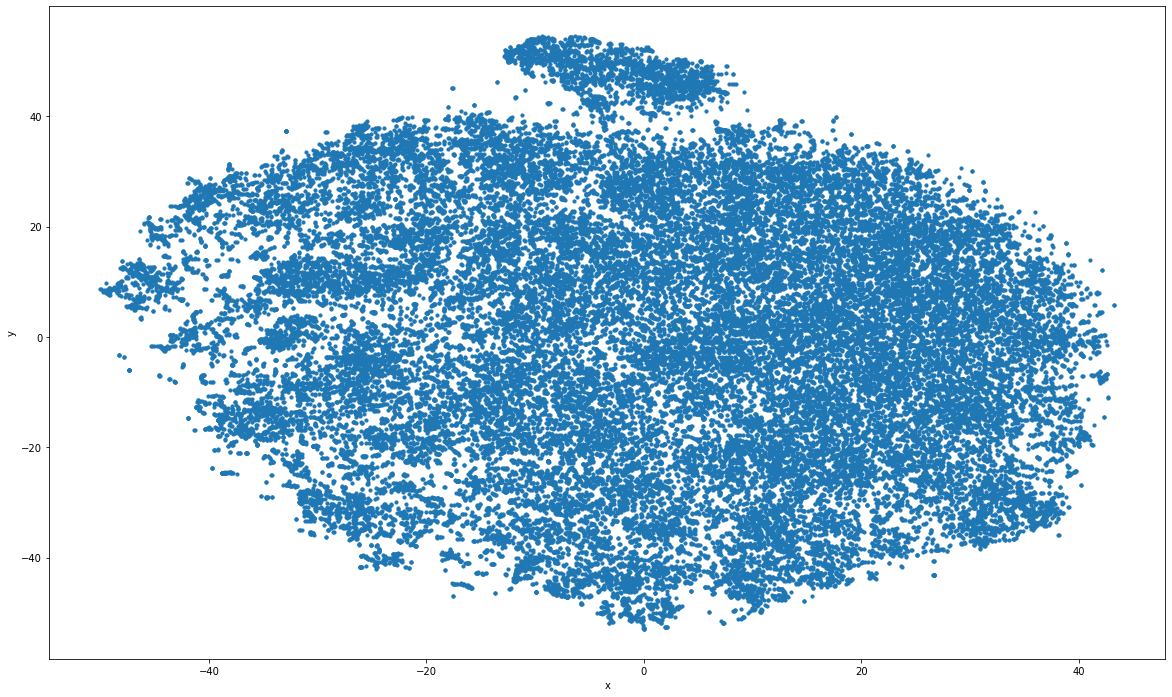

In [17]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12));

In [29]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(15, 10))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.0005, point.y + 0.0005, point.word, fontsize=11)

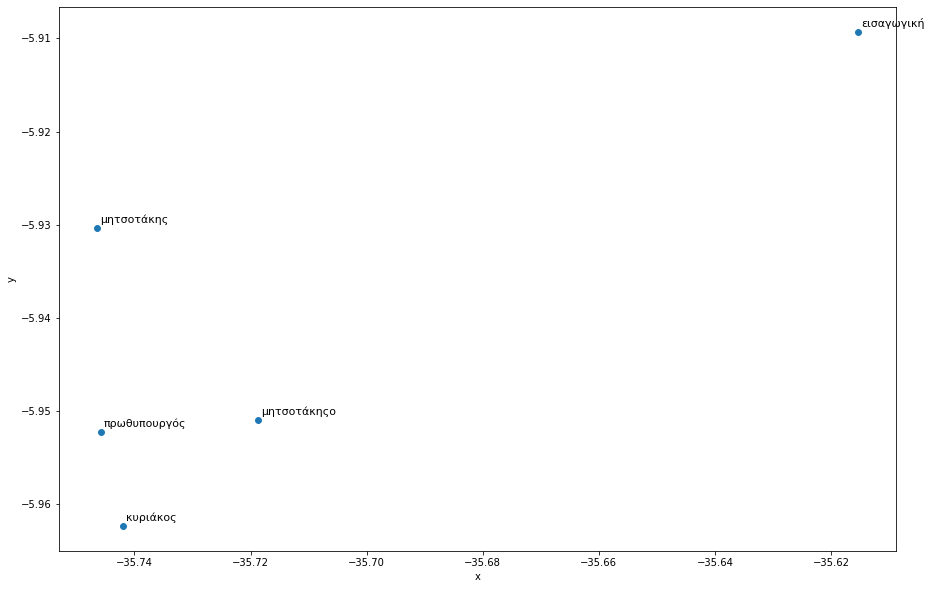

In [45]:
plot_region(x_bounds=(-35.85, -34), y_bounds=(-6, -5.9))